In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Fakenews.csv")

In [3]:
data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [29]:
data=data.dropna(axis=0)
data.reset_index(inplace=True)

In [30]:
data.isnull().sum()

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

In [31]:
x=data['title']
y=data["label"]


In [32]:
import nltk
import re
from nltk.corpus import stopwords

In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [35]:
corpus=[]
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [36]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [37]:
from tensorflow import keras

c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [55]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.models import Sequential

In [56]:
one_hot=[one_hot(word,5000) for word in corpus]

In [57]:
same_dim_one_hot=pad_sequences(one_hot,maxlen=20,
    dtype='int32',
    padding='pre',)

In [58]:
same_dim_one_hot

array([[   0,    0,    0, ..., 4073,  614, 2952],
       [   0,    0,    0, ..., 3898,  949, 3444],
       [   0,    0,    0, ..., 3579, 4845,  544],
       ...,
       [   0,    0,    0, ..., 1236, 3199,  757],
       [   0,    0,    0, ..., 3443, 2758, 2176],
       [   0,    0,    0, ..., 4268,  477, 3809]])

In [59]:
same_dim_one_hot.shape

(18285, 20)

In [60]:
import numpy as np

In [61]:
x=np.array(same_dim_one_hot)
y=np.array(y)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model 

In [63]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(5000, embedding_vector_features, input_length=20))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)


Epoch 1/10
192/192 [==============================] - 17s 88ms/step - loss: 0.3346 - accuracy: 0.8402 - val_loss: 0.1980 - val_accuracy: 0.9153
Epoch 2/10
192/192 [==============================] - 16s 82ms/step - loss: 0.1535 - accuracy: 0.9410 - val_loss: 0.1954 - val_accuracy: 0.9188
Epoch 3/10
192/192 [==============================] - 16s 86ms/step - loss: 0.1160 - accuracy: 0.9583 - val_loss: 0.1996 - val_accuracy: 0.9225
Epoch 4/10
192/192 [==============================] - 16s 85ms/step - loss: 0.0876 - accuracy: 0.9682 - val_loss: 0.2250 - val_accuracy: 0.9228
Epoch 5/10
192/192 [==============================] - 16s 84ms/step - loss: 0.0628 - accuracy: 0.9777 - val_loss: 0.2342 - val_accuracy: 0.9145
Epoch 6/10
192/192 [==============================] - 16s 83ms/step - loss: 0.0459 - accuracy: 0.9843 - val_loss: 0.3089 - val_accuracy: 0.9104
Epoch 7/10
192/192 [==============================] - 16s 83ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.3254 - val_accuracy:

In [70]:
pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [71]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [75]:
cm=confusion_matrix(y_test,pred)
print(cm)

[[3130  289]
 [ 253 2363]]


In [76]:
accuracy_score(y_test,pred)

0.9101905550952776

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3419
           1       0.89      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



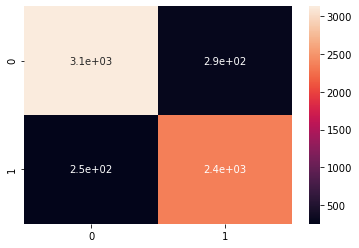

In [81]:
sns.heatmap(cm,annot=True)